In [108]:
include("Energies.jl")
include("newArrheniusEq.jl")
include("Simulation.jl")
using Plots
using Printf
using Statistics
using LinearAlgebra
gr()
display(Ea_values)

6×6 Matrix{Real}:
 0      1.0    0.01  0.01   1.0    1.0
 1.022  0      1.0   1.0    1.005  1.002
 0.06   1.028  0     0.032  1.033  1.03
 0.038  1.006  0.01  0      1.011  1.008
 1.017  1.0    1.0   1.0    0      1.0
 1.02   1.0    1.0   1.0    1.003  0

In [139]:
T_range = 573:100:1173
flow_rates = 0.5:0.5:1.5
threshold = 0.3 # Threshold for most preferable state
t = 600 # seconds
dt = 1.0/2 # 2 layers per second (700nm/hr)
num_steps = t/dt
phase_names = ["x", "α", "β", "κ", "γ", "δ"]
effecting_nums = num_steps
decay_constant = 0.00001
decay_coefficients = decay_constant * flow_rates #assuming the P(r) to be exp(-d * r * #of covering layers)
#print(size(decay_coefficients))
fcoeff = flow_coefficient("exponential", effecting_nums, decay_coefficients)
#print(size(decay_coefficients))
println("fcoeff: ", size(fcoeff))
composition_data = simulate_deposition(fcoeff, Ea_values, T_range, num_steps, dt)
display(composition_data[1])
display(composition_data[3])


fcoeff: (3,)
1
compositions_T: (1,)
compositions_T: (2,)
compositions_T: (3,)
compositions_T: (4,)
compositions_T: (5,)
compositions_T: (6,)
compositions_T: (7,)
compositions_all(7,)1
compositions_T: (1,)
compositions_T: (2,)
compositions_T: (3,)
compositions_T: (4,)
compositions_T: (5,)
compositions_T: (6,)
compositions_T: (7,)
compositions_all(7, 2)1
compositions_T: (1,)
compositions_T: (2,)
compositions_T: (3,)
compositions_T: (4,)
compositions_T: (5,)
compositions_T: (6,)
compositions_T: (7,)
compositions_all(7, 3)

1201×6 Matrix{Float64}:
 1.0       0.0          0.0        0.0        0.0          0.0
 0.918334  8.00209e-11  0.0408329  0.0408329  8.00209e-11  8.00209e-11
 0.844889  1.58253e-10  0.0783248  0.0767858  1.57796e-10  1.58065e-10
 0.778832  2.34857e-10  0.112749   0.108419   2.33534e-10  2.34312e-10
 0.719412  3.09979e-10  0.144357   0.136232   3.07423e-10  3.08926e-10
 0.665958  3.83752e-10  0.173378   0.160664   3.79635e-10  3.82055e-10
 0.617866  4.56295e-10  0.200025   0.182109   4.50323e-10  4.53833e-10
 0.574593  5.27718e-10  0.224491   0.200916   5.1963e-10   5.24384e-10
 0.535653  5.98122e-10  0.246956   0.217391   5.87681e-10  5.93818e-10
 0.500607  6.67596e-10  0.267583   0.23181    6.54592e-10  6.62236e-10
 ⋮                                                         ⋮
 0.181291  7.13116e-8   0.499072   0.319637   6.61682e-8   6.91916e-8
 0.181291  7.13711e-8   0.499072   0.319637   6.62233e-8   6.92492e-8
 0.181291  7.14305e-8   0.499072   0.319637   6.62784e-8   6.93069e-8
 0.

1201×6 Matrix{Float64}:
 1.0       0.0         0.0        0.0        0.0         0.0
 0.913941  1.50991e-8  0.0430296  0.0430296  1.50991e-8  1.50991e-8
 0.837378  2.99192e-8  0.0820027  0.0806191  2.98454e-8  2.9889e-8
 0.769259  4.44883e-8  0.117302   0.113439   4.42753e-8  4.44012e-8
 0.708647  5.88318e-8  0.149273   0.14208    5.84215e-8  5.8664e-8
 0.65471   7.29723e-8  0.17823    0.16706    7.23131e-8  7.27027e-8
 0.606709  8.69302e-8  0.204458   0.188833   8.59765e-8  8.65401e-8
 0.563987  1.00724e-7  0.228213   0.2078     9.94351e-8  1.00197e-7
 0.525961  1.1437e-7   0.249728   0.224311   1.1271e-7   1.13691e-7
 0.49211   1.27882e-7  0.269216   0.238674   1.2582e-7   1.27039e-7
 ⋮                                                       ⋮
 0.215467  1.4654e-5   0.456438   0.328051   1.38817e-5  1.43381e-5
 0.215467  1.46662e-5  0.456438   0.328051   1.38933e-5  1.435e-5
 0.215467  1.46784e-5  0.456438   0.328051   1.39049e-5  1.4362e-5
 0.215467  1.46907e-5  0.456438   0.328051   

In [145]:
max_compositions = most_preferable_state.(composition_data, Ref(threshold), Ref(phase_names))
max_compositions[1,1] = "x"
max_compositions[1,2] = "β"
display(max_compositions)

7×3 Matrix{String}:
 "x"    "β"    "β+κ"
 "β+κ"  "β+κ"  "β+κ"
 "β+κ"  "β+κ"  "β+κ"
 "β+κ"  "β+κ"  "β+κ"
 "β+κ"  "β+κ"  "β+κ"
 "β+κ"  "β+κ"  "β+κ"
 "β+κ"  "β+κ"  "β+κ"

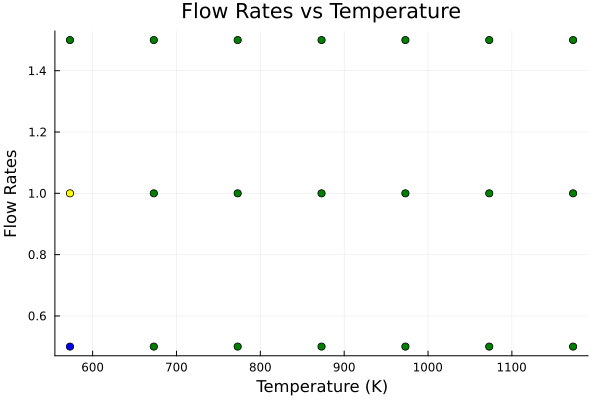

In [146]:
using Plots

# Create a list of colors
colors = ["red", "blue", "green", "yellow", "orange", "purple", "cyan", "magenta", "black", "gray"]

# Create a dictionary that maps each unique value in max_compositions to a color
unique_values = unique(max_compositions)
color_dict = Dict(unique_values[i] => colors[i % length(colors) + 1] for i in 1:length(unique_values))

p = scatter([], [], xlabel="Temperature (K)", ylabel="Flow Rates", title="Flow Rates vs Temperature", legend=false)  # Create an empty scatter plot
for (i, T) in enumerate(T_range)
    for (j, flow_rate) in enumerate(flow_rates)
        color = color_dict[max_compositions[i, j]]  # Get the color based on the max_composition
        scatter!(p, [T], [flow_rate], color=color)  # Add a point to the scatter plot for each combination of T and flow_rate
    end
end
display(p)  # Display the scatter plot

In [101]:
a = [1 2 3; 4 5 6]
b = [4 5 6; 7 8 9]
println(a)
a = vcat(a, b)
println(a)
println(size(a))
print(size([1 2 3]))

[1 2 3; 4 5 6]
[1 2 3; 4 5 6; 4 5 6; 7 8 9]
(4, 3)
(1, 3)

In [87]:
a = [1 2 3; 4 5 6]
b = [4 5 6; 7 8 9]
a .* .exp(b)

Base.Meta.ParseError: ParseError:
# Error @ /Users/posent/Library/CloudStorage/GoogleDrive-posent@andrew.cmu.edu/My Drive/Ga2O3/ArrheniusModel/Test.ipynb:3:6
b = [4 5 6; 7 8 9]
a .* .exp(b)
#    ╙ ── invalid identifier

In [21]:
#testing flow_coefficient function
function flow_coefficient(type, effecting_nums, decay_constant)
    A = 1.0
    flow_coefficients = []
    for i in 1:effecting_nums
        if type == "exponential"
            push!(flow_coefficients, A * exp(-decay_constant * i))
            print("e")
        elseif type == "linear"
            push!(flow_coefficients, A * (1 - decay_constant * i))
        end
    end
    return flow_coefficients
end
effecting_nums = 10
fcoeff = flow_coefficient("exponential", effecting_nums, 0.1)
display(fcoeff)
existing_layers = repeat([0.9, 0.1, 0, 0, 0, 0]', 10)
display(existing_layers)
println(size(existing_layers))

for i in 1:size(existing_layers, 1)
    existing_layers[i, :] = fcoeff[i] * existing_layers[i, :]
end
display(existing_layers)

10-element Vector{Any}:
 0.9048374180359595
 0.8187307530779818
 0.7408182206817179
 0.6703200460356393
 0.6065306597126334
 0.5488116360940264
 0.49658530379140947
 0.44932896411722156
 0.4065696597405991
 0.36787944117144233

10×6 Matrix{Float64}:
 0.9  0.1  0.0  0.0  0.0  0.0
 0.9  0.1  0.0  0.0  0.0  0.0
 0.9  0.1  0.0  0.0  0.0  0.0
 0.9  0.1  0.0  0.0  0.0  0.0
 0.9  0.1  0.0  0.0  0.0  0.0
 0.9  0.1  0.0  0.0  0.0  0.0
 0.9  0.1  0.0  0.0  0.0  0.0
 0.9  0.1  0.0  0.0  0.0  0.0
 0.9  0.1  0.0  0.0  0.0  0.0
 0.9  0.1  0.0  0.0  0.0  0.0

10×6 Matrix{Float64}:
 0.814354  0.0904837  0.0  0.0  0.0  0.0
 0.736858  0.0818731  0.0  0.0  0.0  0.0
 0.666736  0.0740818  0.0  0.0  0.0  0.0
 0.603288  0.067032   0.0  0.0  0.0  0.0
 0.545878  0.0606531  0.0  0.0  0.0  0.0
 0.49393   0.0548812  0.0  0.0  0.0  0.0
 0.446927  0.0496585  0.0  0.0  0.0  0.0
 0.404396  0.0449329  0.0  0.0  0.0  0.0
 0.365913  0.040657   0.0  0.0  0.0  0.0
 0.331091  0.0367879  0.0  0.0  0.0  0.0

eeeeeeeeee(10, 6)


In [20]:
"""
function most_preferable_state(compositions, threshold)
    boolean_compositions = []
    for comp in compositions
        # Average all the layers
        avg_composition = mean(comp, dims=1)
        # True if greater than threshold
        boolean_composition = avg_composition .> threshold
        push!(boolean_compositions, boolean_composition)
    end
    return boolean_compositions
end
"""

"function most_preferable_state(compositions, threshold)\n    boolean_compositions = []\n    for comp in compositions\n        # Average all the layers\n        avg_composition = mean(comp, dims=1)\n        # True if greater than threshold\n        boolean_composition = avg_composition .> threshold\n        push!(boolean_compositions, boolean_composition)\n    end\n    return boolean_compositions\nend\n"

color (generic function with 6 methods)

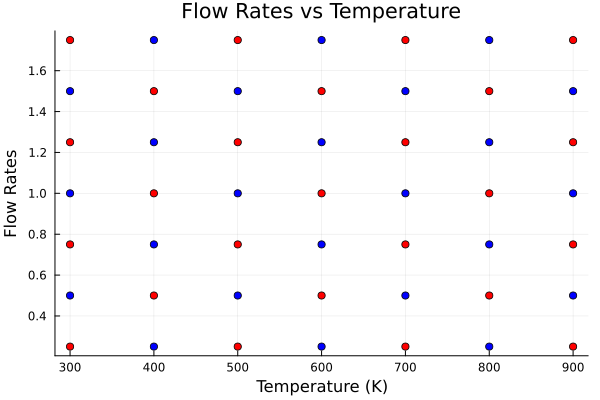

In [9]:
using Plots

T_range = 300:100:900
flow_rates = 0.25:0.25:1.75

p = scatter([], [], xlabel="Temperature (K)", ylabel="Flow Rates", title="Flow Rates vs Temperature", legend=false)  # Create an empty scatter plot
for (i, T) in enumerate(T_range)
    for (j, rate) in enumerate(flow_rates)
        color = (i + j) % 2 == 0 ? "red" : "blue"  # Alternate between "red" and "blue" for each point
        scatter!(p, [T], [rate], color=color)  # Add a point to the scatter plot for each combination of T and rate
    end
end
display(color)
p  # Display the scatter plot
